**Defining Libraries**



In [ ]:
! pip install imgaug #importing the required libraries
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import PIL 
from PIL import Image
import glob
import random
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import asarray
import statistics
from IPython.display import display
import skimage
from skimage import io as skio
from skimage import filters
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab.patches import cv2_imshow
import json
from keras.applications.resnet50 import ResNet50
import codecs
from pandas_profiling import ProfileReport
import pandas as pd
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.patches as patches
import matplotlib
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras.initializers import glorot_uniform
import scipy
from keras import backend as keras_back

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=244887 sha256=3d47a9da39c47eb7e73cd9218d66ec14e9def8d722536775ce8e2bd57b7b37ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-w60epnk3/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


**Dataset Preparation and Assigning Image Labels**

**Converting to PNG and Assigning Labels and Creating a complete Dataset**

In [ ]:
Original_Covid_List = []
Original_nocovid_List = []
Labelled_List = [] #preparing a labelled list where covid images ends with 1 and non covid with 0
count = 0
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Original_Dataset/Covid/*"): #giving the address 
    url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Labelled_Dataset/" + str(count) + ".1.png" #storing address and converting to png
    img = Image.open(i)
    img.save(url) #saving the image for later purposes
    count = count+1;
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Original_Dataset/No_Covid/*"): #giving the address
    url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Labelled_Dataset/" + str(count) + ".0.png" #storing address and converting to png
    img = Image.open(i) #opening the image
    img.save(url) #saving the image
    count = count+1;
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Original_Dataset/Covid/*"):
    Original_Covid_List.append(i) #creating covid list
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Original_Dataset/No_Covid/*"):
    Original_nocovid_List.append(i) #creating nocovid list
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Labelled_Dataset/*"):
    Labelled_List.append(i) #creating labelled list
print("Number of Covid Images =" + str(len(Original_Covid_List))) #printing number of Covid Images
print("Number of No_Covid Images =" + str(len(Original_nocovid_List))) #printing number of Non Covid Images
print("Number of Labelled Images =" + str(len(Labelled_List))) # printing total number of Images

**Extracting ROI**

In [ ]:
count = 0
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Labelled_Dataset/*"): #looping over all images
    light_spots = [] #initializing a lsit to store white color pixels 
    img = Image.open(i).convert('RGB')
    img = img.resize((224,224)) #resize the image 
    if i.endswith("1.png"): label = 1
    if i.endswith("0.png"): label = 0
    pixels = asarray(img) #getting the values of the image
    for j in range(0,224): #looping over all the pixels 
        for k in range(0,224):
            if pixels[j][k][0] > 250 and pixels[j][k][1] > 250 and pixels[j][k][2] > 250:
                light_spots.append([j,k]) #appending all the light spots
    l_h_x = 0
    r_l_x = 224
    t_h_y = 0
    b_l_y = 224
    for i in light_spots:
        if i[0] > l_h_x and i[0] < 30: #extracting the required pixels
            l_h_x = i[0]
        if i[1] > t_h_y and i[1] < 30: #extracting the required pixels
            t_h_y = i[1]
        if i[0] < r_l_x and i[0] > 190: #extracting the required pixels
            r_l_x = i[0]
        if i[1] < b_l_y and i[1] > 190: #extracting the required pixels
            b_l_y = i[1]
    Cropped_Image = img.crop((l_h_x - 5, t_h_y - 5, r_l_x + 5, b_l_y + 5)) #cropping the image
    ROI.append(Cropped_Image)
    url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/ROI/" + str(count) + "." + str(label) + ".png" #storing address
    Cropped_Image.save(url) #saving the image
    count = count + 1


**Augmenting The Data**

In [ ]:
count = 0
augmented_images = []
o = -1
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/ROI/*"): #looping over ROI images
    j = random.randint(0,4) #generating a random number 
    if j == 0: # checking the condition
        image = imageio.imread(i) #reading the image
        c = iaa.GammaContrast(gamma=2.0) #contrast
        image = c.augment_image(image)
        augmented_images.append(image)
        if i.endswith("1.png"):
            o = 1
        else:
            o = 0
        image = Image.fromarray(image)
        url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Augmented_Datset/" + str(count) + "." + str(o) + ".png" #storing address
        image.save(url)
        count = count + 1
    if j == 1: # checking the condition 
        image = imageio.imread(i) #reading the image
        f = iaa.Fliplr(p=1.0) #flipping the image
        image = f.augment_image(image)
        augmented_images.append(image) #appending the image
        if i.endswith("1.png"): #getting the label
            o = 1
        else:
            o = 0
        image = Image.fromarray(image)
        url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Augmented_Datset/" + str(count) + "." + str(o) + ".png" #storing address #storing the image
        image.save(url)
        count = count + 1
    if j == 2: # checking the condition
        image = imageio.imread(i) #reading the image
        r = iaa.Affine(rotate=(-40, 20)) #rotating the image 
        image = r.augment_image(image)
        augmented_images.append(image) #appending the image
        if i.endswith("1.png"): #getting the label
            o = 1
        else:
            o = 0
        image = Image.fromarray(image)
        url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Augmented_Datset/" + str(count) + "." + str(o) + ".png" #storing address
        image.save(url)
        count = count + 1
    if j == 3: # checking the condition
        image = imageio.imread(i) #reading the image
        s = iaa.Affine(shear=(0,20)) #shearing 
        image = s.augment_image(image)
        augmented_images.append(image) #appending the image
        if i.endswith("1.png"): #getting the label
            o = 1
        else:
            o = 0
        image = Image.fromarray(image)
        url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Augmented_Datset/" + str(count) + "." + str(o) + ".png" #storing address
        image.save(url)
        count = count + 1
    if j == 4: # checking the condition
        image = imageio.imread(i) #reading the image
        g = iaa.AdditiveGaussianNoise(15,20) #adding noise
        image = g.augment_image(image)
        augmented_images.append(image) #appending the image
        if i.endswith("1.png"): #getting the label
            o = 1
        else:
            o = 0
        image = Image.fromarray(image)
        url = "/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Augmented_Datset/" + str(count) + "." + str(o) + ".png" #storing address
        image.save(url)
        count = count + 1


**Retrieving the ROI Data and Augmented Data into a list for further processing**

In [ ]:
Order_List = []
Labelled_List = []
Normalization = []
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/ROI/*"): #giving the address to retrieve the elements 
    if i.endswith("1.png"): #checking if it is a covid image
        Labelled_List.append(img) #appending to the list
        Order_List.append(1) #appending the label
        img = cv2.imread(i)
        res_img = cv2.resize(img, (224,224))
        Normalization.append(res_img)
    if i.endswith("0.png"): #checking if it is a non covid image
        Labelled_List.append(img) #appending to the list
        Order_List.append(0) #appending the label
        img = cv2.imread(i)
        res_img = cv2.resize(img, (224,224))
        Normalization.append(res_img)
for i in glob.glob(r"/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/Augmented_Datset/*"): #giving the address to retrieve the elements 
    if i.endswith("1.png"): #checking if it is a covid image
        Labelled_List.append(img) #appending to the list
        Order_List.append(1) #appending the label
        img = cv2.imread(i)
        res_img = cv2.resize(img, (224,224))
        Normalization.append(res_img)
    if i.endswith("0.png"): #checking if it is a non covid image
        Labelled_List.append(img) #appending to the list
        Order_List.append(0) #appending the label
        img = cv2.imread(i)
        res_img = cv2.resize(img, (224,224))
        Normalization.append(res_img)
print("Number of Total Images = ",len(Labelled_List)) #printing total number of images
print("Number of Total Labels = ",len(Order_List)) #printing total number of labels

Number of Total Images =  1332
Number of Total Labels =  1332


**Normalization**

In [ ]:
Normalization = np.array(Normalization) #converting to ndarray
Normalization = Normalization.astype('float32') / 255.0 #dividing the values by 255 to normalize the images
#Alternate Logic
#for i in glob.glob(r""):
    #ROI.append(i) #creating labelled list
    #pix = i.load()
    #for j in range(0,224):
        #for k in range(0,224):
            #l = pix[j,k][0]
            #m = pix[j,k][1]
            #n = pix[j,k][2]
            #pix[j,k] = (int(l/255),int(m/255),int(n/255))

**Centering**

In [ ]:
centering = []
for i in Normalization:
    mean = i.mean() #finding the mean of the pixels
    centering.append(i - mean) #appending to the list the resultant value after doing the subtraction
#Alternate Logic
#for j in range(0,224):
        #for k in range(0,224):
            #for l in range(0,3):
                #count = count + pixels[j,k][l]
    #mean = count/150528;
    #for j in range(0,224):
        #for k in range(0,224):
            #l = pixels[j,k][0]
            #m = pixels[j,k][1]
            #n = pixels[j,k][2]
            #pixels[j,k] = (int(l - mean),int(m - mean),int(n - mean))

**Standardization**

In [ ]:
Deviation = []
for i in centering:
    std = i.std() #finding the standard deviation
    Deviation.append(i/std) #appending to the deviation list
#Alternate Logic
#for j in range(0,224):
        #for k in range(0,224):
            #for l in range(0,3):
                #values.append(pixels[j,k][l])
    #std = statistics.pstdev(values)
    #for j in range(0,224):
        #for k in range(0,224):
            #l = pixels[j,k][0]
            #m = pixels[j,k][1]
            #n = pixels[j,k][2]
            #pixels[j,k] = (int(l/std),int(m/std),int(n/std))

**Dividing the Dataset into Training and Testing Dataset!**

In [ ]:
l = []
final_training = []
final_testing = []
final_testing_type = []
final_training_type = []
for i in range(0,len(Labelled_List)):
    l.append([Deviation[i],Order_List[i]])
random.shuffle(l) #randomizing the list
training,testing = train_test_split(l,test_size=0.20) #splitting the data into train and test
print("Number of Images for Training = " + str(len(training)) ) #printing the length of the list
print("Number of Images for Testing = " + str(len(testing)) )
for i in training: #getting the array and label
    final_training.append(i[0])
    final_training_type.append(i[1])
for i in testing: #getting the array and label
    final_testing.append(i[0])
    final_testing_type.append(i[1])
with open('/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/training.txt', 'w') as f: #saving it as text files
    f.write(str(final_training))
with open('/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/training_order.txt', 'w') as g:
    g.write(str(final_training_type))
with open('/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/testing.txt', 'w') as h:
    h.write(str(final_testing))
with open('/content/drive/MyDrive/End_Sem/BTP_COVID19/Datasets/testing_order.txt', 'w') as j:
    j.write(str(final_testing_type))
final_training_type = np.array(final_training_type) #converting them to ndarrays
final_training = np.array(final_training)
final_testing_type = np.array(final_testing_type)
final_testing = np.array(final_testing)

Number of Images for Training = 1065
Number of Images for Testing = 267



**RESNET 50 - Pre-trained RESNET**

In [ ]:
model = ResNet50(weights='imagenet') #setting the pretrained model
result = model.predict(final_training) #predicting the result
for i in range(0,5): #showing the result
    print(decode_predictions(result, top=1)[i])

[('n01930112', 'nematode', 0.029502422)]
[('n04447861', 'toilet_seat', 0.03976858)]
[('n03729826', 'matchstick', 0.10471574)]
[('n02840245', 'binder', 0.040579434)]
[('n02840245', 'binder', 0.048188362)]


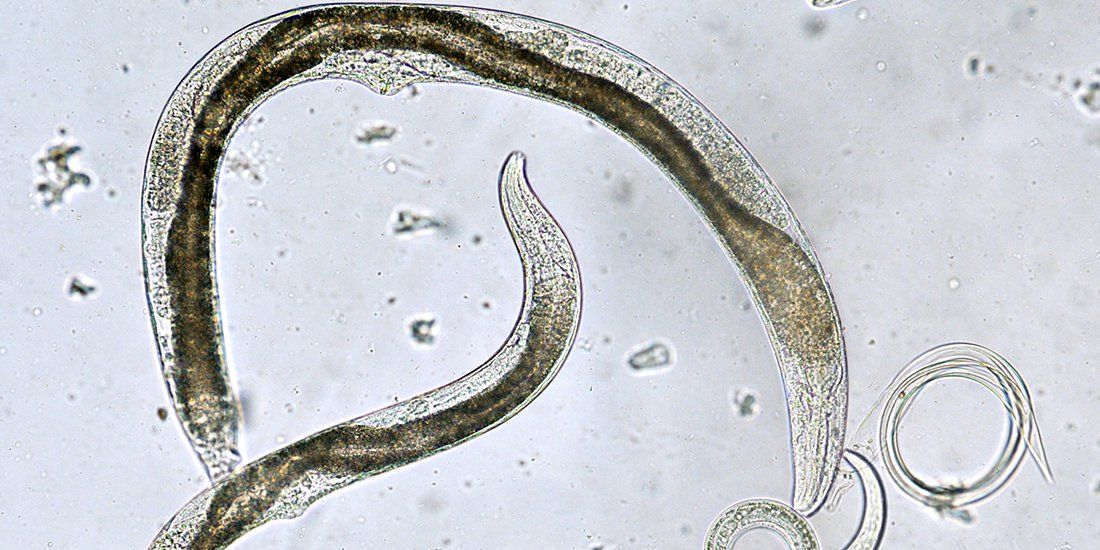

**Step - 5: RESNET 50 - From Scratch**

**CONV_BN_RELU**

In [ ]:
def CONV_BN_RELU(X,Identity_Block_filters,i_kernal_size,i_strides,i_padding,i_axis): #defining the function
    X = Conv2D(filters = Identity_Block_filters,kernel_size = i_kernal_size, strides = i_strides, padding = i_padding ) (X) #CONV2d
    X = BatchNormalization(axis = i_axis)(X) #BN
    X = Activation('relu')(X) #RELU
    return X


**CONV_BN_RELU_NO_GIVEN_PADDING**

In [ ]:
def CONV_BN_RELU_NO_PADDING(X,Identity_Block_filters,i_kernal_size,i_strides,i_axis): #defining the function
    X = Conv2D(filters = Identity_Block_filters,kernel_size = i_kernal_size, strides = i_strides) (X) #CONV2d
    X = BatchNormalization(axis = i_axis)(X) #BN
    X = Activation('relu')(X) #RELU
    return X

**CONV_BN**

In [ ]:
def CONV_BN(X,Identity_Block_filters,i_kernal_size,i_strides,i_padding,i_axis): #defining the function
    X = Conv2D(filters = Identity_Block_filters,kernel_size = i_kernal_size, strides = i_strides, padding = i_padding ) (X) #CONV2d
    X = BatchNormalization(axis = i_axis)(X) #BN
    return X

**Defining Identity Block**

In [ ]:
def Identity_Block(X,Identity_Block_filters): #defining the function
    X_Cal = X #Storing the input to add it later
    X = CONV_BN_RELU(X,Identity_Block_filters[0],(1,1),(1,1),'valid',3) #calling the function
    X = CONV_BN_RELU(X,Identity_Block_filters[1],(3,3),(1,1),'same',3) #calling the function
    X = CONV_BN(X,Identity_Block_filters[2],(1,1),(1,1),'valid',3) #calling the function
    X = Add()([X,X_Cal]) #Adding the input to output
    X = Activation('relu')(X) #RELU
    return X

**Defining Convolutional Block**

In [ ]:
def Convolution_Block(X,Identity_Block_filters,stride): #defining the function
    X_Cal = X #Storing the input to add it later
    X_Cal = CONV_BN(X,Identity_Block_filters[2],(1,1),stride,'valid',3) #changing the size
    X = CONV_BN_RELU(X,Identity_Block_filters[0],(1,1),stride,'valid',3) #calling the function
    X = CONV_BN_RELU(X,Identity_Block_filters[1],(3,3),(1,1),'same',3) #calling the function
    X = CONV_BN(X,Identity_Block_filters[2],(1,1),(1,1),'valid',3) #calling the function
    X = Add()([X,X_Cal]) #Adding the input to output
    X = Activation('relu')(X) #RELU
    return X

**Building RESNET 50 Model**

In [ ]:
def RESNET(Input_size = (224,224,3),n = 1): #defining RESNET architecture
    input = Input(Input_size) 
    Input_Value = ZeroPadding2D((3,3))(input) #calling each layers and functions to complete architecture
    Input_Value = CONV_BN_RELU_NO_PADDING(Input_Value,64,(7,7),(2,2),3)
    Input_Value = MaxPooling2D((3,3),strides = (2,2))(Input_Value)
    Input_Value = Convolution_Block(Input_Value,[64,64,256],(1,1))
    Input_Value = Identity_Block(Input_Value,[64,64,256])
    Input_Value = Identity_Block(Input_Value,[64,64,256])
    Input_Value = Convolution_Block(Input_Value,[128,128,512],(2,2))
    Input_Value = Identity_Block(Input_Value,[128,128,512])
    Input_Value = Identity_Block(Input_Value,[128,128,512])
    Input_Value = Identity_Block(Input_Value,[128,128,512])
    Input_Value = Convolution_Block(Input_Value,[256,256,1024],(2,2))
    Input_Value = Identity_Block(Input_Value,[256,256,1024])
    Input_Value = Identity_Block(Input_Value,[256,256,1024])
    Input_Value = Identity_Block(Input_Value,[256,256,1024])
    Input_Value = Identity_Block(Input_Value,[256,256,1024])
    Input_Value = Identity_Block(Input_Value,[256,256,1024])
    Input_Value = Convolution_Block(Input_Value,[512,512,2048],(2,2))
    Input_Value = Identity_Block(Input_Value,[512,512,2048])
    Input_Value = Identity_Block(Input_Value,[512,512,2048])
    Input_Value = AveragePooling2D((2,2),name = "avg_pool")(Input_Value)
    Input_Value = Flatten()(Input_Value)
    Input_Value = Dense(n,activation='sigmoid',kernel_initializer=glorot_uniform(seed=0))(Input_Value)
    model = Model(inputs = input,outputs = Input_Value,name= "RESNET") #defining the model
    return model #returning the model


In [ ]:
model = RESNET(Input_size=(224, 224, 3), n = 1) #setting the model

In [ ]:
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics = ['accuracy']) #compiling the model giving optimizer and other attributes

In [ ]:
model.summary() #printing the summary

Model: "RESNET"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 112, 112, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_106 (BatchN (None, 112, 112, 64) 256         conv2d_106[0][0]                 
_____________________________________________________________________________________________

**Training the Data**

In [ ]:
model.fit(final_training,final_training_type,epochs = 10, batch_size = 64) #training 

Epoch 1/10
17/17 [==============================] - 767s 44s/step - loss: 1.9421 - accuracy: 0.5297
Epoch 2/10
17/17 [==============================] - 739s 43s/step - loss: 0.6951 - accuracy: 0.6195
Epoch 3/10
17/17 [==============================] - 741s 44s/step - loss: 0.6010 - accuracy: 0.7056
Epoch 4/10
17/17 [==============================] - 742s 44s/step - loss: 0.5433 - accuracy: 0.7396
Epoch 5/10
17/17 [==============================] - 747s 44s/step - loss: 0.4311 - accuracy: 0.8048
Epoch 6/10
17/17 [==============================] - 746s 44s/step - loss: 0.2564 - accuracy: 0.9275
Epoch 7/10
17/17 [==============================] - 738s 43s/step - loss: 0.3133 - accuracy: 0.9320
Epoch 8/10
17/17 [==============================] - 742s 44s/step - loss: 0.4356 - accuracy: 0.8257
Epoch 9/10
17/17 [==============================] - 735s 43s/step - loss: 0.5608 - accuracy: 0.7261
Epoch 10/10
17/17 [==============================] - 738s 43s/step - loss: 0.2126 - accuracy: 0.9092

**Testing the Data**

In [ ]:
count = 0
result = model.predict(final_testing) #predicting the results
for i in range(0,len(final_testing_type)):
    if result[i] > 0.50: #changing values to 0 or 1
        result[i] = 1
    else:
        result[i] = 0
for i in range(0,len(final_testing_type)):
    if result[i] == final_testing_type[i]:
        count = count + 1 #calculating accuracy
print("Accuracy = ",count/len(final_testing_type) * 100)

Accuracy =  69.66292134831461


**Confusion Matrix**

In [ ]:
from sklearn import metrics #showing the confusion matrix
print(metrics.confusion_matrix(final_testing_type,result, labels=[0,1]))
print(metrics.classification_report(final_testing_type,result, labels=[0,1]))

[[105  39]
 [ 42  81]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       144
           1       0.68      0.66      0.67       123

    accuracy                           0.70       267
   macro avg       0.69      0.69      0.69       267
weighted avg       0.70      0.70      0.70       267



**Pandas Profiling**

In [ ]:
data = [] #pandas profiling
for i in range(0,len(result)):
    data.append([final_testing_type[i],int(result[i][0])])
df = pd.DataFrame(data,columns = ['Input','Output'])
print(df)
profile = df.profile_report(title='Pandas Profiling Report')
profile

**Finding Severity Cases**

In [ ]:
outputs = []
for i in model.layers:
    outputs.append(i.output)
maps = keras_back.function([model.input], [outputs])
l_m_h = [0,0,0]
sl = ["Low","Medium","High"] #defining severity levels
covid_index = [i for i, n in enumerate(final_testing_type) if n == 1] #obtaining index of covid positive images
for i in covid_index:
    image = final_training[i:i+1] 
    feature_map = maps([image]) #getting the feature map
    cnn_outputs = feature_map[0][0][176] #the final layer
    if cnn_outputs < 0.45: #assigning severity
          l_m_h[0] = l_m_h[0] + 1
    if cnn_outputs > 0.45 and cnn_outputs < 0.50 :
          l_m_h[1] = l_m_h[1] + 1
    if cnn_outputs > 0.50:
          l_m_h[2] = l_m_h[2] + 1
print(str(sl[0]) + " - " + str(l_m_h[0])) #printing the results
print(str(sl[1]) + " - " + str(l_m_h[1]))
print(str(sl[2]) + " - " + str(l_m_h[2]))

Low - 53
Medium - 8
High - 62
